# Introducing k-Means

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [10]:
X, y = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)

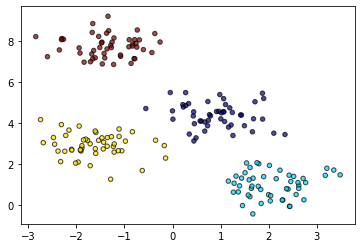

In [18]:
plt.scatter(X[:,0], X[:,1], c=y, s=20,cmap='jet', edgecolor='black', linewidth=1, alpha=0.7)

In [19]:
from sklearn.cluster import KMeans

In [45]:
model = KMeans(n_clusters=4)
model.fit(X) # one fitted the centers will be generated
y_kmeans = model.fit(X).predict(X) # predict function will classify the data point

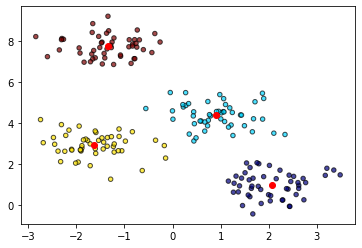

In [46]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=20,cmap='jet', edgecolor='black', linewidth=1, alpha=0.7)
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='r')

## The number of clusters must be selected beforehand

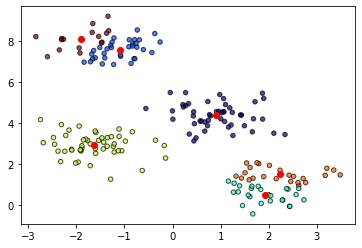

In [53]:
model = KMeans(n_clusters=6, random_state=32)
model.fit(X) # one fitted the centers will be generated
y_kmeans = model.fit(X).predict(X) # predict function will classify the data point
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=20,cmap='jet', edgecolor='black', linewidth=1, alpha=0.7)
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='r')

## k-means is limited to linear cluster boundaries

In [54]:
from sklearn.datasets import make_moons

In [64]:
X,y = make_moons(200, noise=.05, random_state=0)
model = KMeans(n_clusters=2)
y_Kmeans = model.fit(X).predict(X)


In [69]:
centers = model.fit(X).cluster_centers_

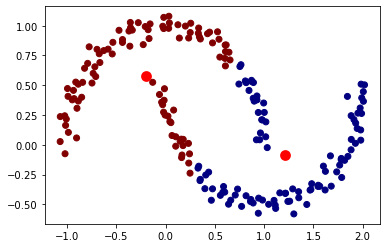

In [83]:
plt.scatter(X[:,0],X[:,1], c=y_Kmeans, cmap='jet')
plt.scatter(centers[:,0], centers[:,1],c='r', s=60, edgecolor='red', linewidth=3)

In [84]:
from sklearn.cluster import SpectralClustering

In [86]:
model2 = SpectralClustering(n_clusters=2, affinity = 'nearest_neighbors', 
                            assign_labels='kmeans')  # check the parameters

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


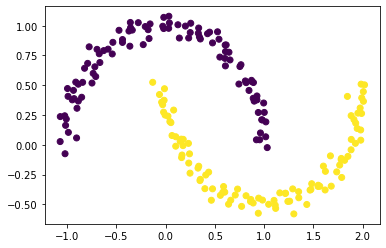

In [95]:
y_new2 = model2.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=y_new2)

##  Example 1: k-Means on digits

In [101]:
from sklearn.datasets import load_digits
digits = load_digits() 
digits.data.shape

(1797, 64)

In [104]:
model3 = KMeans(n_clusters=10)
model3.fit(digits.data)
y_pred = model3.fit(digits.data).predict(digits.data)

In [171]:
y_pred.shape

(1797,)

In [107]:
clusters = model3.cluster_centers_

In [108]:
clusters.shape

(10, 64)

In [138]:
clusters[1]

array([ 0.00000000e+00,  1.11111111e-01,  3.98666667e+00,  1.18400000e+01,
        1.23555556e+01,  5.32444444e+00,  4.26666667e-01,  0.00000000e+00,
        8.88888889e-03,  8.62222222e-01,  8.21777778e+00,  1.35244444e+01,
        1.26444444e+01,  9.83555556e+00,  1.52444444e+00, -4.16333634e-17,
        1.30104261e-18,  1.19555556e+00,  8.30222222e+00,  1.19422222e+01,
        1.22711111e+01,  9.42666667e+00,  1.03555556e+00,  0.00000000e+00,
        0.00000000e+00,  9.20000000e-01,  7.15111111e+00,  1.41155556e+01,
        1.41688889e+01,  5.00444444e+00,  2.13333333e-01,  0.00000000e+00,
        0.00000000e+00,  7.64444444e-01,  7.96888889e+00,  1.48266667e+01,
        1.29022222e+01,  2.22666667e+00,  6.22222222e-02,  0.00000000e+00,
        0.00000000e+00,  1.23111111e+00,  1.05555556e+01,  1.20444444e+01,
        1.20755556e+01,  4.11111111e+00,  2.80000000e-01,  1.04083409e-17,
        1.33333333e-02,  8.40000000e-01,  9.56888889e+00,  1.15066667e+01,
        1.20266667e+01,  

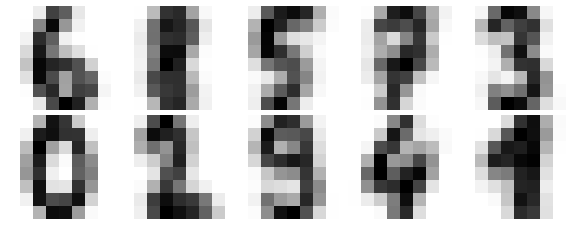

In [130]:
fig,axes = plt.subplots(2, 5, figsize=(10,4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw = dict(hspace=0.01, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(clusters[i].reshape(8,8), cmap='binary')
    for j in ax.spines.values():
        j.set_visible(False)

In [139]:
digits.target.shape

(1797,)

In [158]:
labels = np.zeros_like(clusters) 
labels.shape

(10, 64)

In [157]:
y_pred == 1

array([False,  True,  True, ...,  True, False, False])

In [182]:
labels = np.zeros_like(y_pred)
labels.shape

(1797,)

In [187]:
from scipy.stats import mode
labels = np.zeros_like(y_pred)
for i in range(10): # give y_pred an order from 0 to 9
    mask = (y_pred==i)
    labels[mask] = mode(digits.target[mask])[0]

In [188]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7941012799109627

In [189]:
from sklearn.metrics import confusion_matrix

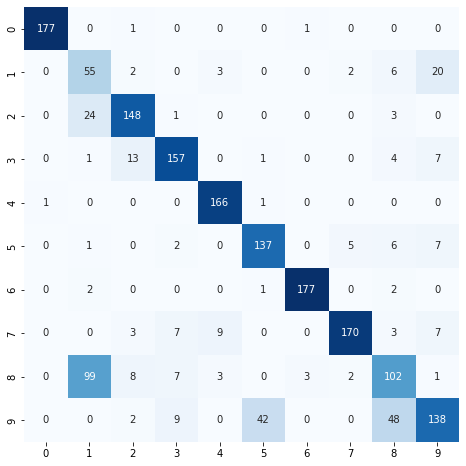

In [197]:
mat = confusion_matrix(labels, digits.target)
sns.heatmap(mat, annot=True, square=True, cbar=False, cmap='Blues', fmt='d')
fig = plt.gcf()
fig.set_size_inches(10,8)

In [198]:
from sklearn.manifold import TSNE

In [199]:
model = TSNE(n_components=2, init='pca')

In [206]:
trans = model.fit_transform(digits.data)

In [205]:
kmeans = KMeans(n_clusters=10)

In [314]:
df = pd.DataFrame(trans)

In [322]:
df['y'] = y_
df.columns=['A', 'B', 'Y']

In [338]:
centers = kmeans.fit(trans).cluster_centers_

/Users/david/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


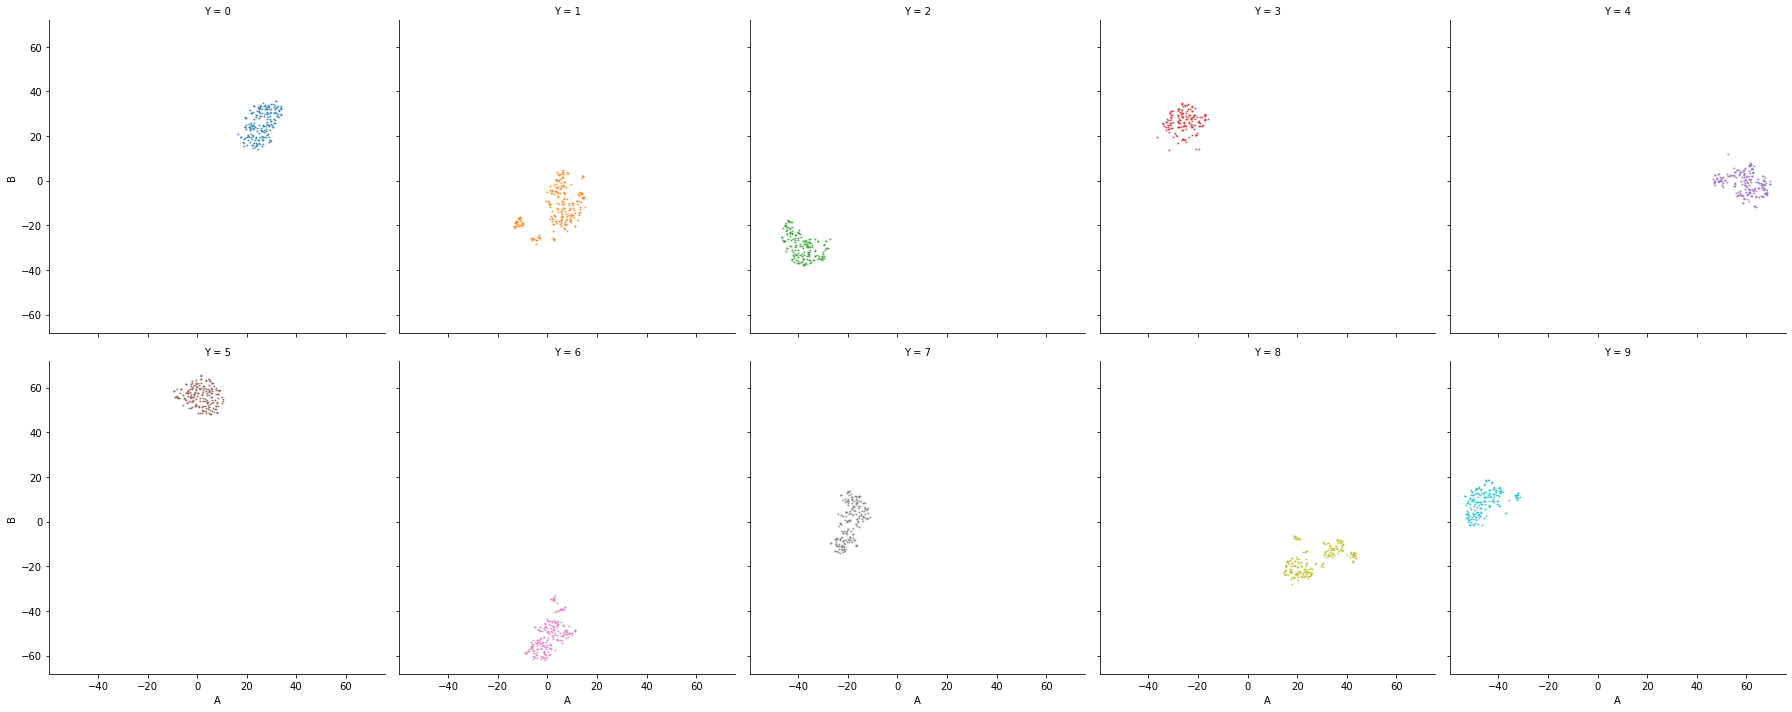

In [345]:
sns.lmplot( 'A', 'B', data=df, col='Y', hue='Y', markers='>', scatter_kws=dict(s=1), fit_reg=False, col_wrap=5)

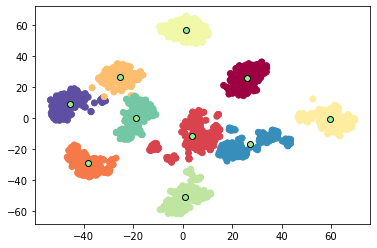

In [248]:
plt.scatter(trans[:,0], trans[:,1], c=y_, cmap='Spectral')
plt.scatter(centers[:,0], centers[:,1], facecolor='lightgreen', edgecolor='black')

In [207]:
y_ = kmeans.fit(trans).predict(trans)

In [210]:
y_.shape

(1797,)

In [216]:
label = np.zeros_like(y_)
for i in range(10):
    mask = (y_==i)
    label[mask] = mode(digits.target[mask])[0]

In [217]:
accuracy_score(label, digits.target)

0.9449081803005008

In [240]:
from sklearn.metrics import plot_confusion_matrix

In [245]:
mat = confusion_matrix(label, digits.target)

<AxesSubplot:>

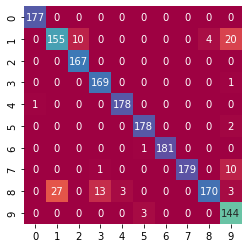

In [246]:
sns.heatmap(mat, annot=True, fmt='d', square=True, cbar=False, cmap='Spectral')

## Example 2: k-means for color compression

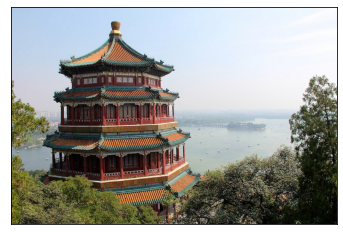

In [286]:
from sklearn.datasets import load_sample_image 
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [253]:
china.shape

(427, 640, 3)

In [303]:
china1 = china/255
data = china1.reshape(640*427, 3)
data.shape

(273280, 3)

In [257]:
from sklearn.cluster import MiniBatchKMeans

In [309]:
model_A = MiniBatchKMeans(16)
fit = model_A.fit(data)
center = fit.cluster_centers_[fit.predict(data)] # not clear how it works

In [350]:
fit.cluster_centers_.shape

(16, 3)

In [310]:
fit.predict(data).shape

(273280,)

In [311]:
center.shape

(273280, 3)

In [312]:
new = center.reshape(china.shape)

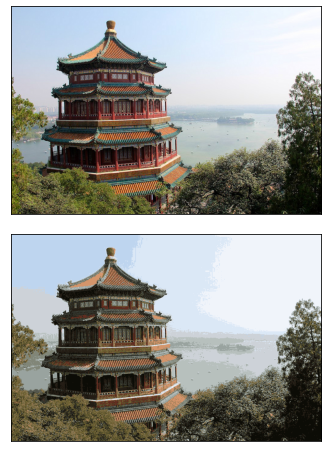

In [313]:
fig, axes = plt.subplots(2,1,figsize = (6,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes[0].imshow(china)
axes[1].imshow(new)
